# Reinforcement Learning with Q-Tables and OpenAI Gym

## Taxi-Environment
![screenshot of environment](Screenshot_Taxi.png)

In [1]:
# import Libraries
import numpy as np
import gym
import random

In [2]:
# Hyperparameters
discount_factor = 0.01
gamma =0.5
alpha = 0.5     #learning_rate
epochs = 1001
epsilon =0.3    #exploration_rate
state= 328

# Start of playground
env = gym.make("Taxi-v3").env
env.reset()

print(f"Action Space: {env.action_space}")
print(f"State Space: {env.observation_space}")

qTable = np.zeros([env.observation_space.n,env.action_space.n])

Action Space: Discrete(6)
State Space: Discrete(500)


In [3]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [10]:
# Learning
frames = []        # saves renderings for video of learning process
for i in range(epochs):
    state = env.reset()
    done = False

    penalties, reward = 0, 0
    while not done:
        if random.uniform(0,1) <epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(qTable[state])
            
        next_state, reward, done, _ = env.step(action) 
        old_q = qTable[state,action]
        next_max = np.max(qTable[next_state])
        new_q = (1-alpha)*old_q + alpha*(reward+gamma*next_max)
        qTable[state,action]=new_q
        
        if reward == -10:
            penalties += 1

        state = next_state
        
        frames.append({
            'frame': env.render(mode='ansi'),
            'state': state,
            'action': action,
            'reward': reward
            }      
        )
    if i % 100 == 0:
        print(f"Episode: {i}")

Episode: 0
Episode: 100
Episode: 200
Episode: 300
Episode: 400
Episode: 500
Episode: 600
Episode: 700
Episode: 800
Episode: 900


In [18]:
# Plotting function
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])#.getvalue())
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
# shows video of learning process 
print_frames(frames[950:1000])

+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Timestep: 50
State: 256
Action: 0
Reward: -1


In [11]:
# shows learned process and achieved average performance
total_episodes, total_penalties, total_rewards = 0, 0,0
epochs = 1000


for _ in range(epochs):
    state = env.reset()
    episodes, penalties, reward = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0,1) < 0.1*epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(qTable[state])
        state, reward, done, _ = env.step(action)

        if reward == -10:
            penalties += 1
            
        episodes +=1

    total_penalties += penalties
    total_episodes += episodes
    total_rewards += reward

    
print(f"Results after {epochs} episodes:")
print(f"Average timesteps per episode: {total_episodes / epochs}")
print(f"Average penalties per episode: {total_penalties / epochs}")
print(f"Average reward per episode: {total_rewards / epochs}")

Results after 1000 episodes:
Average timesteps per episode: 13.413
Average penalties per episode: 0.123
Average reward per episode: 20.0


# CartPole
![screenshot of Environment](Screenshot_Cartpole.png)

In [56]:
# import Libraries
import numpy as np
import random
import gym
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [57]:
# Hyperparameters
alpha = 0.5
min_alpha = 0.1
lr = 1.0
epsilon = 0.5
min_epsilon = 0.1
epochs = 1000

# start Environment
env = gym.make("CartPole-v1").env
observation=env.reset()

qTable=np.zeros(tuple([1,1,6,12])+ (env.action_space.n,))

In [58]:
# render() the Environment once
# doesn't close automatically 
env.render()

True

In [59]:
# run to close the render() of cell before
env.close()

In [60]:
def plot(frames):
    plt.plot(frames)

In [61]:
# update epsilon, uses logaritmic decrease
def get_epsilon(epoche):
    return max(min_epsilon, min(1., 1.0 - math.log10((epoche+1)/25)))

In [79]:
# update alpha, uses logaritmic decrease
def get_alpha(epoche):
    return max(min_alpha, min(1.,1.0 - math.log10((epoche+1)/25)))

Episode finished after 25 timesteps.
Mean is: 0.0
Episode finished after 20 timesteps.
Mean is: 0.5
Episode finished after 27 timesteps.
Mean is: 1.0
Episode finished after 23 timesteps.
Mean is: 1.5
Episode finished after 20 timesteps.
Mean is: 2.0
Episode finished after 16 timesteps.
Mean is: 2.5
Episode finished after 26 timesteps.
Mean is: 3.0
Episode finished after 22 timesteps.
Mean is: 3.5
Episode finished after 16 timesteps.
Mean is: 4.0
Episode finished after 19 timesteps.
Mean is: 4.5
Episode finished after 30 timesteps.
Mean is: 5.0
Episode finished after 30 timesteps.
Mean is: 5.5
Episode finished after 15 timesteps.
Mean is: 6.0
Episode finished after 45 timesteps.
Mean is: 6.5
Episode finished after 26 timesteps.
Mean is: 7.0
Episode finished after 13 timesteps.
Mean is: 7.5
Episode finished after 20 timesteps.
Mean is: 8.0
Episode finished after 19 timesteps.
Mean is: 8.5
Episode finished after 16 timesteps.
Mean is: 9.0
Episode finished after 24 timesteps.
Mean is: 9.5


Episode finished after 205 timesteps.
Mean is: 82.0
Episode finished after 103 timesteps.
Mean is: 82.53939393939395
Episode finished after 22 timesteps.
Mean is: 83.07831325301204
Episode finished after 38 timesteps.
Mean is: 83.61676646706587
Episode finished after 31 timesteps.
Mean is: 84.1547619047619
Episode finished after 54 timesteps.
Mean is: 84.6923076923077
Episode finished after 56 timesteps.
Mean is: 85.22941176470589
Episode finished after 44 timesteps.
Mean is: 85.76608187134502
Episode finished after 207 timesteps.
Mean is: 86.30232558139535
Episode finished after 258 timesteps.
Mean is: 86.83815028901734
Episode finished after 219 timesteps.
Mean is: 87.3735632183908
Episode finished after 131 timesteps.
Mean is: 87.90857142857143
Episode finished after 122 timesteps.
Mean is: 88.44318181818181
Episode finished after 102 timesteps.
Mean is: 88.9774011299435
Episode finished after 171 timesteps.
Mean is: 89.51123595505618
Episode finished after 239 timesteps.
Mean is: 9

Episode finished after 387 timesteps.
Mean is: 217.44329896907217
Episode finished after 388 timesteps.
Mean is: 220.03082191780823
Episode finished after 356 timesteps.
Mean is: 222.62116040955632
Episode finished after 339 timesteps.
Mean is: 225.22108843537416
Episode finished after 491 timesteps.
Mean is: 227.83389830508474


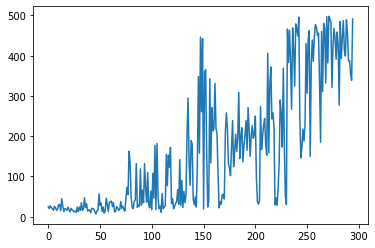

In [74]:
# learning process
frames = []
qTable= np.zeros((1,1,6,12)+(env.action_space.n,))
j = 0
scores=[]
for i in range(epochs):
    done=False
    state = calculate_state(env.reset()) 

    alpha = get_alpha(i)
    epsilon = get_epsilon(i)
    j = 0

    for t in range(500):
 #       env.render()           # uncomment to show learning process via the rendering,  is very slow
        if np.random.random() <= epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(qTable[state])
        observation, reward, done, _ = env.step(action)
        next_state=calculate_state(observation)

        old_q = qTable[state][action]
        next_max = np.max(qTable[next_state])
        qTable[state][action] =  (1. - alpha) * old_q + alpha * (reward + lr * next_max)
        state=next_state
        j+=1
        
        if done:
            frames.append(t)
            print(f"Episode finished after {t} timesteps.")
            scores.append(i)
            mean_score = np.mean(scores)
            print(f"Mean is: {mean_score}")
            break
plot(frames)

In [82]:
# calculated the state depending on theta and theta_dot  (x and v is ignored)
# uses 6 and 12 buckets for theta and theta_dot --> 6*12 different states
def calculate_state(observation):
    # position, vertical speed, angle, angular accelaration
    x, v, theta, dot=observation
    
    scale_t = (theta + abs(env.observation_space.low[2])) / (env.observation_space.high[2]-env.observation_space.low[2])
    t_state = min(5,max(0,int(round(5*scale_t))))
    
    scale_dot = (dot + abs(-math.radians(50))) / (math.radians(50)-(-math.radians(50)))
    dot_state = min(11,max(0, int(round(11*scale_dot))))
    
    return tuple([0,0,t_state,dot_state])


Plot of Performance of the Learning Process:
![sceenshot of Plot](Screenshot_CartPole_Outcome.png)

In [75]:
# show q Table for the reenforcement learning
qTable

array([[[[[   0.        ,    0.        ],
          [   0.        ,    0.        ],
          [   0.        ,    0.        ],
          [   0.        ,    0.        ],
          [   0.        ,    0.        ],
          [   0.        ,    0.        ],
          [   0.        ,    0.        ],
          [   0.        ,    0.        ],
          [   0.        ,    0.        ],
          [   0.        ,    0.        ],
          [   0.        ,    0.        ],
          [   0.        ,    0.        ]],

         [[  32.5656939 ,   36.96828736],
          [  14.64762614,   33.24091845],
          [  10.33224392,   33.09199186],
          [   0.        ,   24.53940894],
          [   5.96978964,   30.13069738],
          [  17.72774174,    0.        ],
          [   0.        ,   21.0159019 ],
          [  57.34958998,   59.57225384],
          [   0.        ,    0.        ],
          [   0.        ,    0.        ],
          [   0.        ,    0.        ],
          [   0.        ,    0. 

# FrozenLake
![screenshot of Environment](Screenshot_FrozenLake.png)

In [35]:
# import Libraries
import numpy as np
import random
import gym

In [36]:
# Hyperparameters
epochs = 10001
discount_factor = 0.1
alpha = 0.5      #learning_rate
epsilon= 0.3     #exploration_rate

# Start Enviroment
env = gym.make("FrozenLake-v0").env
env.reset()

qTable = np.zeros([env.observation_space.n, env.action_space.n])

In [37]:
env.render()


SFFF
FHFH
FFFH
HFFG


In [38]:
# learning process
frames = []     # save frames for video of learning process
for i in range(epochs):
    state = env.reset()
    done = False
    reward, penalty = 0,0
    
    while not done:
        if random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(qTable[state])
        next_state, reward, done, _ = env.step(action) 
        old_q = qTable[state,action]
        next_max = np.max(qTable[next_state])
        if next_state in [5,7,11,12]:
            penalty += 1
            reward -=10
        elif next_state==15:
            reward +=20
        else:
            reward-=1
        new_q = (1-alpha)*old_q + alpha*(reward + discount_factor*next_max)
        qTable[state,action]=new_q

            
        state = next_state
        
        frames.append({
            'frame': env.render(mode='ansi'),
            'state': state,
            'action': action,
            'reward': reward
            }      
        )
    if i % 100 == 0:
        print(f"Episode: {i}")

Episode: 0
Episode: 100
Episode: 200
Episode: 300
Episode: 400
Episode: 500
Episode: 600
Episode: 700
Episode: 800
Episode: 900
Episode: 1000
Episode: 1100
Episode: 1200
Episode: 1300
Episode: 1400
Episode: 1500
Episode: 1600
Episode: 1700
Episode: 1800
Episode: 1900
Episode: 2000
Episode: 2100
Episode: 2200
Episode: 2300
Episode: 2400
Episode: 2500
Episode: 2600
Episode: 2700
Episode: 2800
Episode: 2900
Episode: 3000
Episode: 3100
Episode: 3200
Episode: 3300
Episode: 3400
Episode: 3500
Episode: 3600
Episode: 3700
Episode: 3800
Episode: 3900
Episode: 4000
Episode: 4100
Episode: 4200
Episode: 4300
Episode: 4400
Episode: 4500
Episode: 4600
Episode: 4700
Episode: 4800
Episode: 4900
Episode: 5000
Episode: 5100
Episode: 5200
Episode: 5300
Episode: 5400
Episode: 5500
Episode: 5600
Episode: 5700
Episode: 5800
Episode: 5900
Episode: 6000
Episode: 6100
Episode: 6200
Episode: 6300
Episode: 6400
Episode: 6500
Episode: 6600
Episode: 6700
Episode: 6800
Episode: 6900
Episode: 7000
Episode: 7100
Epis

In [42]:
# shows video of learning process
print_frames(frames[99900:100000])

  (Right)
SFFF
FHFH
FFFH
HFFG

Timestep: 100
State: 4
Action: 2
Reward: -1.0


In [44]:
total_episodes, total_penalties, total_rewards = 0, 0,0
epochs = 1000


for _ in range(epochs):
    state = env.reset()
    episodes, penalties, reward = 0, 0, 0
    done = False
    will_done=False
    
    while not done:
        if random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(qTable[state])        
        
        state, reward, will_done, info = env.step(action)

        if next_state in [5,7,11,12]:
            penalties += 1
            reward -=10
        if next_state==15:
            reward +=20 
        else:
            reward -=1
        episodes +=1
        done = will_done


    total_penalties += penalties
    total_episodes += episodes
    total_rewards += reward
    



print(f"Results after {epochs} episodes:")
print(f"Average timesteps per episode: {total_episodes / epochs}")
print(f"Average penalties per episode: {total_penalties / epochs}")
print(f"Average reward per episode: {total_rewards / epochs}")



Results after 1000 episodes:
Average timesteps per episode: 17.077
Average penalties per episode: 17.077
Average reward per episode: -10.878


## MountainCar with non-random Start-State
![screenshot of environment](Screenshot_MountainCart.png)

In [76]:
import numpy as np
import random
import gym
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [77]:
# Hyperparameters
min_epsilon = 0.1
min_alpha = 0.1
epochs = 10000
lr = 1.0

# Start Environment
env = gym.make("MountainCar-v0").env
env.reset()

array([-0.46237893,  0.        ])

In [78]:
def plot(frames):
    plt.plot(frames)

In [80]:
# update alpha, uses logaritmic decrease
def get_alpha(epoch):
    return max(min_alpha, min(0., 1.0 - math.log10((epoch+1)/25)))

In [81]:
# update epsilon, uses logaritmic decrease
def get_epsilon(epoch):
    return max(min_epsilon, min(0., 1.0 - math.log10((epoch+1)/25)))

In [83]:
# calculate state depending on x and v
# uses 10 buckets for x and v  --> 100 different states
def calculate_state(observation):
    x,v = observation
    
    scale_x = (x + abs(env.observation_space.low[0])) / (env.observation_space.high[0]-env.observation_space.low[0])
    x_state = min(9,max(0,int(round(9*scale_x))))
    
    scale_v = (v + abs(env.observation_space.low[1])) / (env.observation_space.high[1]-env.observation_space.low[1])
    v_state = min(9,max(0, int(round(9*scale_v))))
    
    
    return tuple([x_state,v_state])

In [ ]:
# learning Process
frames = []
qTable = np.zeros((10,10)+(3,))
for i in range(epochs):
    state = calculate_state(env.reset())
    done = False
    alpha = get_alpha(i)
    epsilon = get_epsilon(i)
    state=(8,8)       # fixed start space
    for t in range(500):
        env.render()       # uncomment to render the learning process, is very slow
        if random.uniform (0,1) <= epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(qTable[state])
        observation, reward, done , _ = env.step( action ) 
        next_state = calculate_state(observation)
        
        old_q = qTable[state][action]
        next_max = np.max(qTable[next_state])
        qTable[state][action] = (1.-alpha)*old_q + alpha*(reward + lr*next_max)
        state = next_state
        
        if observation[0] >= 0.5:
            print("reached")
        
        if done:
            frames.append(t)
            print(f"Episode finished after {t} timesteps.")
            break
#plot(frames)
env.close()

In [88]:
env.close()